<div style="text-align:center">
    <h1>
        Value Iteration
    </h1>
</div>
<br>

<div style="text-align:center">
    <p>
        In this notebook we are going to look at a dynamic programming algorithm called value iteration. In it, we will sweep the state space and update all the V(s) values.
    </p>
</div>

<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 3 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

## Initialize the environment

In [25]:
env =  Maze()

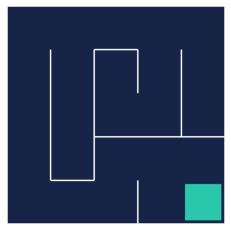

In [26]:
frame =  env.render(mode='rgb_array') #='rbg_array' to repres the image as an array of pixel
plt.axis('off')
plt.imshow(frame)

In [27]:
print(f"Observation space shape: {env.observation_space.nvec}") # observation_space.nvec = nrows & ncols and each state is 
#the combination of rows and cols
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define the policy $\pi(\cdot|s)$

#### Create the policy $\pi(\cdot|s)$

In [28]:
policy_probs =np.full((5, 5, 4), 0.25) # table of 5*5*4 states with 4 possible actions [.25, .25, .25, .25]
policy_probs

array([[[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]]])

In [37]:
def policy(state):
    return policy_probs[state] # state=(row, col) will index a value in the table

#### Test the policy with state (0, 0)

In [38]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probablity of taking action {action}: {prob}")

Probablity of taking action 0: 0.25
Probablity of taking action 1: 0.25
Probablity of taking action 2: 0.25
Probablity of taking action 3: 0.25


#### See how the random policy does in the maze

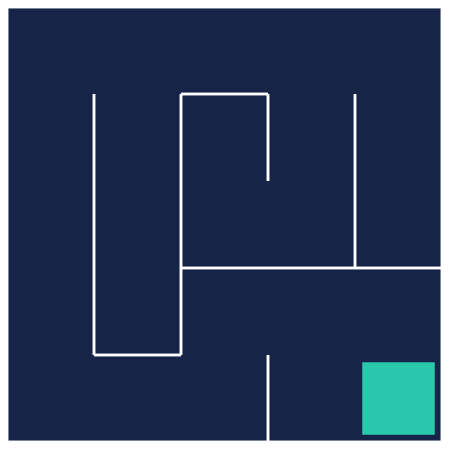

In [36]:
test_agent(env, policy, episodes=1) #random policy

#### Plot the policy

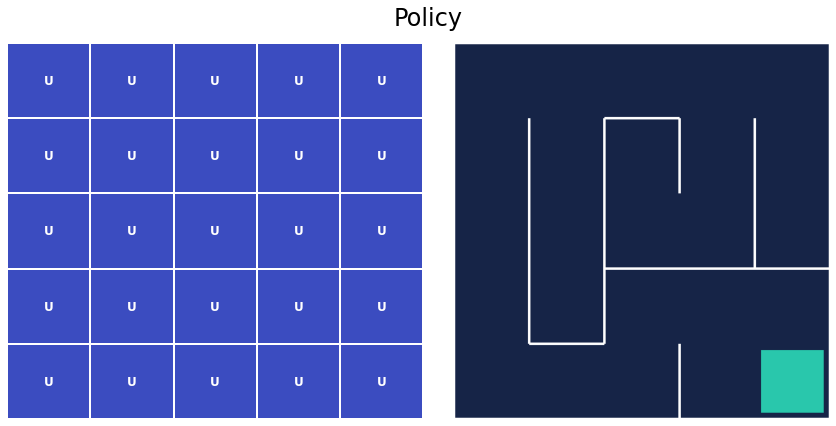

In [39]:
plot_policy(policy_probs, frame)

## Define value table $V(s)$

#### Create the $V(s)$ table

In [41]:
state_values =np.zeros(shape=(5,5))

#### Plot $V(s)$

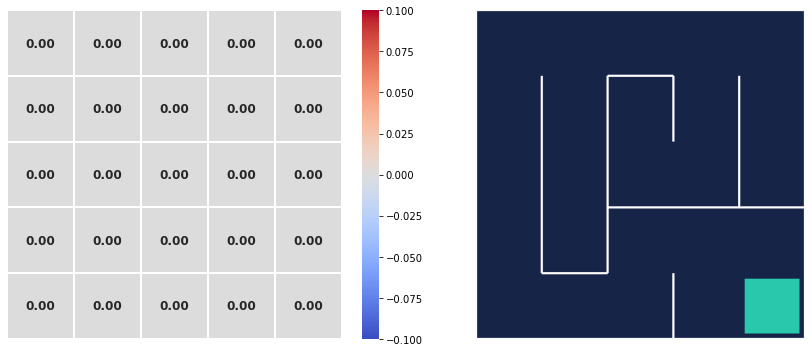

In [42]:
plot_values(state_values, frame)

## Implement the Value Iteration algorithm

</br>


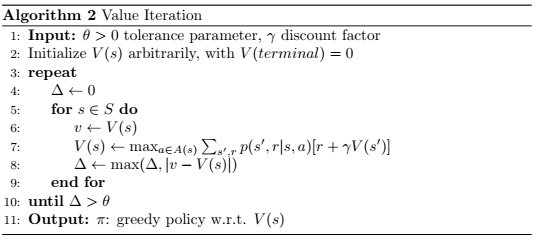

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [47]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=.99):
    delta = float("inf")
    
    while delta > theta:
        delta = 0
        for row in range(5):
            for col in range(5):
                old_value =  state_values[(row, col)]
                
                #Now we need to look for the action with high retrun
                action_probs =  None
                max_qsa = float("-inf") #to store the highest return
                
                #simulate the next_state to get the info --> model env in DP in action
                #what woulb be the result/reward of taking each action (without having to perform that action)--> They need 
                # to have access to the state transition dynamic of the env
                for action in range(4):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    qsa =  reward + gamma * state_values[next_state]
                    
                    if qsa > max_qsa:
                        max_qsa = qsa
                        
                        #update the policy to have 100% prob of selection this action
                        action_probs = np.zeros(4) #initialize
                        action_probs[action] = 1.
                    
                # update the value estimate of the present state as a highest return obtained by the optimal value
                state_values[(row, col)] = max_qsa
                policy_probs[(row, col)] = action_probs #update the prob table used by the policy to choose the opt action
                    
                #update the value of delta
                delta =  max(delta, abs(max_qsa - old_value))

In [48]:
value_iteration(policy_probs, state_values)

## Show results

#### Show resulting value table $V(s)$

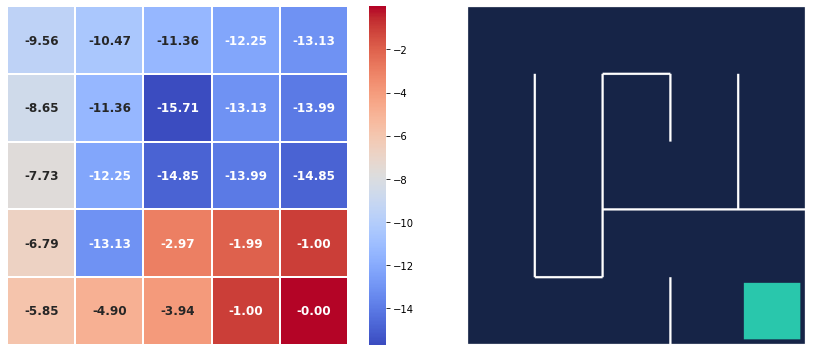

In [49]:
plot_values(state_values, frame)

In [54]:
%%latex
farther way we move from the goal, the lower the state value of value of the state, each action leads to -1. 
reward except the goal which is 0.0. -15.71 is the farthest. -9.56 is the value of the initial state under the optimal policy

<IPython.core.display.Latex object>

#### Show resulting policy $\pi(\cdot|s)$

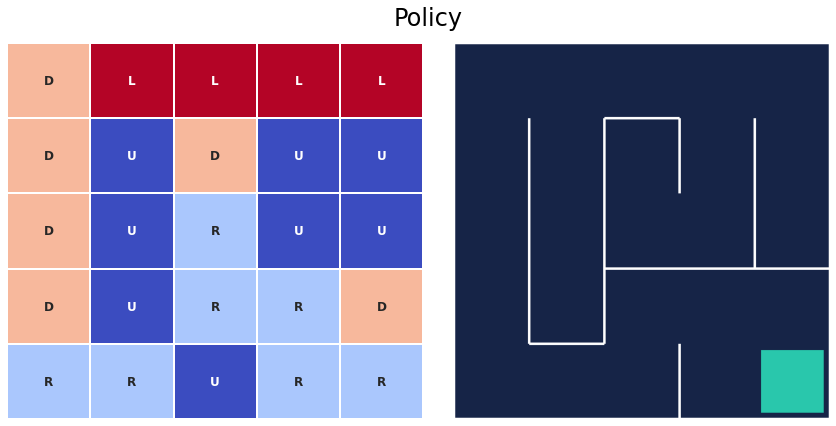

In [55]:
plot_policy(policy_probs, frame)

In [ ]:
%%latex
we can see the optimal action in bold move from initial state moving down D, then right R, ect..
These are the values that the optimal policy prescribed

#### Test the resulting agent

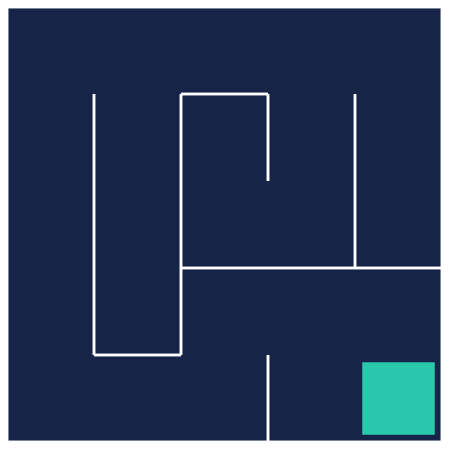

In [56]:
test_agent(env, policy)

In [57]:
%%latex
We can see that the value we obtained is the optimal, becaue it found the shortest path to the exit

<IPython.core.display.Latex object>

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)